In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

In [2]:
#chargement des données
data = pd.read_csv('dataport.csv', sep=";") 
data.head()

,importateur,jan,fev,mars,avr,mai,juin,juillet,out,sept,oct,nov,dec,nbmarque,nbagenceoff,origine,type
0,ADEV SARL,190,22,285,484,238,19,335,189,240,73,227,45,1,1,asiatique,S
1,AFRIQUE AUTO,385,481,601,491,220,398,488,602,933,214,451,156,2,1,american,S
2,ALPHA FORD,206,271,625,569,1057,980,1187,276,677,905,566,191,1,2,american,S
3,ALPHA HYUNDAI MOTOR,25,22,431,284,400,646,494,540,478,1064,425,73,1,4,asiatique,S
4,ALPHA INTER,23,22,25,28,25,29,68,41,13,14,58,16,2,2,european,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   importateur  19 non-null     object
 1   jan          19 non-null     int64 
 2   fev          19 non-null     int64 
 3   mars         19 non-null     int64 
 4   avr          19 non-null     int64 
 5   mai          19 non-null     int64 
 6   juin         19 non-null     int64 
 7   juillet      19 non-null     int64 
 8   out          19 non-null     int64 
 9   sept         19 non-null     int64 
 10  oct          19 non-null     int64 
 11  nov          19 non-null     int64 
 12  dec          19 non-null     int64 
 13  nbmarque     19 non-null     int64 
 14  nbagenceoff  19 non-null     int64 
 15  origine      19 non-null     object
 16  type         19 non-null     object
dtypes: int64(14), object(3)
memory usage: 2.6+ KB


In [ ]:
#dimensions : nombre de lignes, nombre de colonnes
print(data.shape)

(19, 17)


In [ ]:
#Les noms des colonnes
print(data.columns)

Index(['importateur', 'jan', 'fev', 'mars', 'avr', 'mai', 'juin', 'juillet',
       'out', 'sept', 'oct', 'nov', 'dec', 'nbmarque', 'nbagenceoff',
       'origine', 'type'],
      dtype='object')


In [ ]:
#Type de chaque colonne
print(data.dtypes)

importateur    object
jan            int64 
fev            int64 
mars           int64 
avr            int64 
mai            int64 
juin           int64 
juillet        int64 
out            int64 
sept           int64 
oct            int64 
nov            int64 
dec            int64 
nbmarque       int64 
nbagenceoff    int64 
origine        object
type           object
dtype: object


In [ ]:
#Description des données
print(data.describe())

              jan          fev         mars          avr          mai  \
count  19.000000   19.000000    19.000000    19.000000    19.000000     
mean   252.105263  472.473684   887.368421   688.894737   806.052632    
std    265.666854  569.545371   1256.040525  790.806894   895.993147    
min    0.000000    0.000000     0.000000     0.000000     25.000000     
25%    59.500000   62.000000    36.500000    114.500000   95.500000     
50%    190.000000  155.000000   285.000000   344.000000   400.000000    
75%    324.000000  917.500000   1202.500000  1081.000000  1439.500000   
max    887.000000  1912.000000  4267.000000  2441.000000  2716.000000   

              juin      juillet          out         sept          oct  \
count  19.000000    19.000000    19.000000    19.000000    19.000000     
mean   690.210526   770.526316   614.368421   547.105263   527.210526    
std    723.960832   739.856620   598.472241   478.118755   482.868119    
min    0.000000     18.000000    0.000000     

In [ ]:
#vérification des valeurs uniques
data[['origine']].nunique()

origine    3
dtype: int64

In [ ]:
#faire la somme des mois 
df = pd.DataFrame(data,columns=['jan', 'fev', 'mars', 'avr', 'mai', 'juin', 'juillet','out', 'sept', 'oct', 'nov', 'dec'])
sum_column = df.sum(axis=1)
dataset = data.drop(['jan', 'fev', 'mars', 'avr', 'mai', 'juin', 'juillet', 'out', 'sept', 'oct', 'nov', 'dec'], axis=1)

In [ ]:
#concatenation
dataset = pd.concat([dataset,sum_column], axis=1)

In [ ]:
#encodage
Type = pd.get_dummies(dataset.type).iloc[:,1:]
dataset = pd.concat([dataset,Type], axis=1)
origin = pd.get_dummies(dataset.origine).iloc[:,1:]
dataset = pd.concat([dataset,origin], axis=1)

In [ ]:
#suppression des colonnes inuyiles 
dataset = dataset.drop(['asiatique'], axis=1)
dataset = dataset.drop(['origine'], axis=1)
dataset = dataset.drop(['type'], axis=1)
dataset = dataset.drop(['importateur'], axis=1)

In [ ]:
#renommer les colonnes
dataset.rename(columns = {'S':'Type'}, inplace = True)
dataset.rename(columns = {0:'Sum'}, inplace = True)

In [ ]:
#suppression des colonnes inuyiles 
dataset = dataset.drop(['nbmarque'], axis=1)
dataset = dataset.drop(['european'], axis=1)

In [ ]:
#organiser notre datframe
cols = list(dataset.columns.values)
cols.pop(cols.index('nbagenceoff'))
dataset = dataset[cols+['nbagenceoff']]
cols = list(dataset.columns.values)
cols.pop(cols.index('Sum'))
dataset = dataset[cols+['Sum']]
cols = list(dataset.columns.values)
cols.pop(cols.index('Type'))
dataset = dataset[cols+['Type']]
dataset.head()

,nbagenceoff,Sum,Type
0,1,2347,1
1,1,5420,1
2,2,7510,1
3,4,4882,1
4,2,362,1


In [ ]:
data_kmeans = dataset.copy()
data_he = dataset.copy()

Text(0, 0.5, 'Inertia')

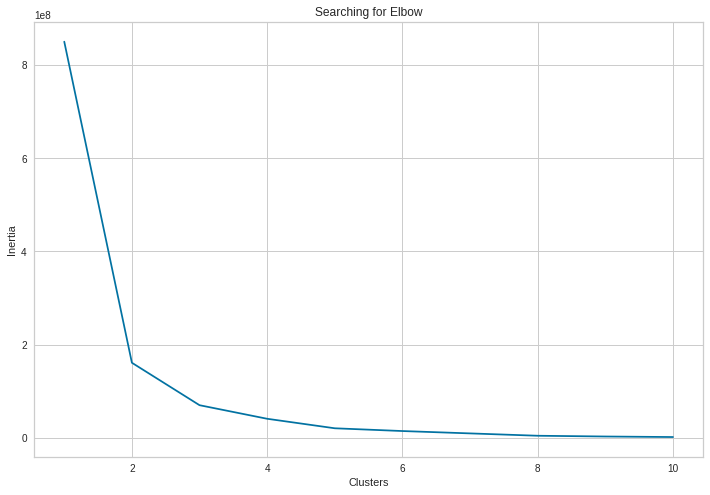

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data_kmeans)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
km3 = KMeans(n_clusters=2).fit(data_kmeans)

data_kmeans['Labels'] = km3.labels_

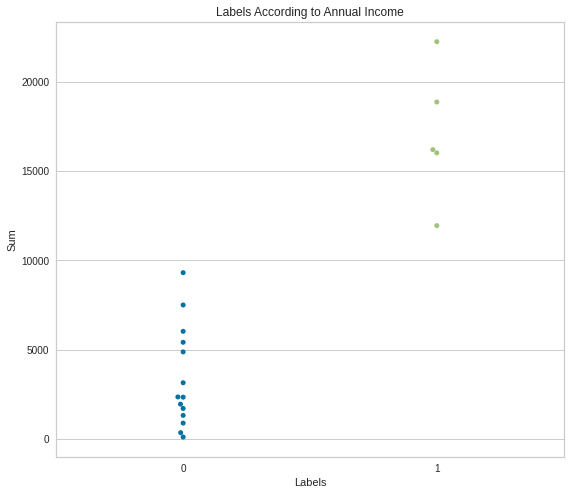

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Sum', data=data_kmeans, ax=ax)
ax.set_title('Labels According to Annual Income')

plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

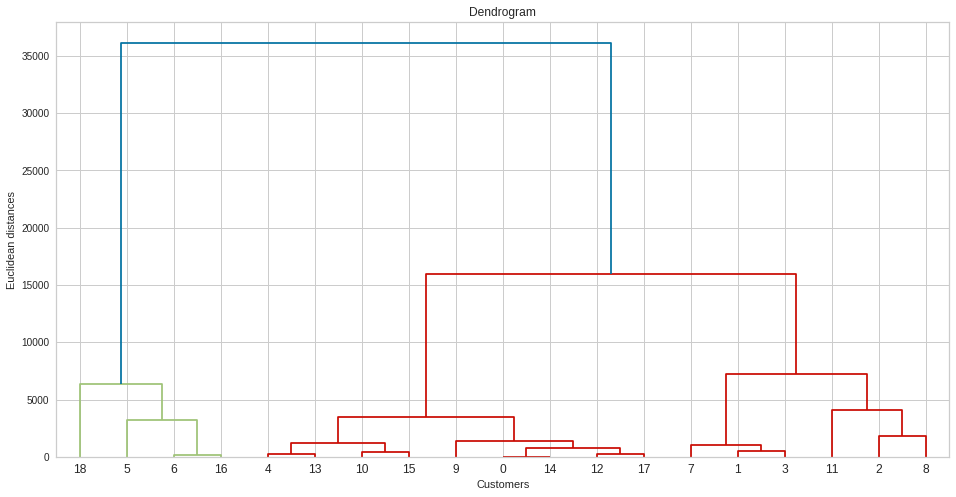

In [ ]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(data_he, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(data_he)
y_hc

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
data_he['cluster'] = pd.DataFrame(y_hc)

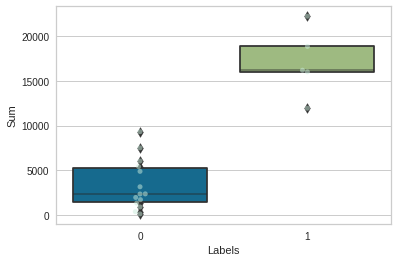

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["Sum"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["Sum"])
plt.show()

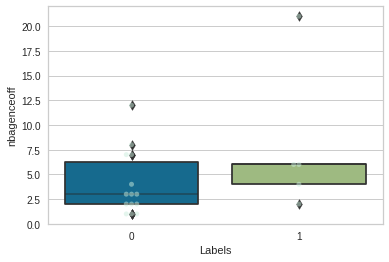

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data_kmeans["Labels"], y=data_kmeans["nbagenceoff"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_kmeans["Labels"], y=data_kmeans["nbagenceoff"])
plt.show()